# "Statistics for Hackers"
> "A collection of simulation tricks."

- author: Christopher Thiemann
- toc: true
- branch: master
- badges: true
- comments: true
- categories: [statistics]
- hide: false
- search_exclude: true
- image: images/statistics_for_hackers.png

Inspired by talks like from [Jake van der Plas](https://www.youtube.com/watch?v=Iq9DzN6mvYA) I will collect here all "simulation tricks" regards statistical quantities. 

Note as statistics/probability theory is notorious for being difficult and sometimes giving counterintuitive results. One should never replace all statistical theory throw out of the window and just use some and replace it by a for loop. In the best case, a simulation should only be used to verify a theoretical result or at least know what theoretical quantity you are actually estimating.

On the other hand, one should take advantage of the computational power at hand. The carefully derived distribution of test statistics or tables of quantiles for a distribution simply had to be calculated by simply because they had no other choice back in the days. 

Or even when I had to calculate the probability of some normal distributed random variable had to transform it to a standard normal and then look up the probability while conceptually not unimportant I would now always simply ask the computer directly for the cumulative distribution function of my untransformed random variable.

In [1]:
#hide
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm

## Estimating Propabilities

I think everyone remembers tasks should as "Assume X to be normally distributed with mean $\mu = 3$ and $\sigma = 2$. Calculate the probability of P(X > 4) ?" The quantity of interest is thus

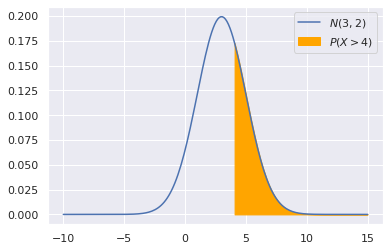

In [29]:
#hide_input
fig, axes = plt.subplots()

x = np.linspace(-10, 15, 200)
y = norm.pdf(x, loc = 3, scale = 2)

axes.plot(x, y, label = r"$N(3, 2)$")
axes.fill_between(x[x > 4], y[x > 4], color = 'orange', label = r"$P(X > 4)$")

axes.legend();

One way to solve this problem is to apply a linear transformation to $X$ such that it becomes standart normal i.e. $ \frac{X - \mu}{\sigma}$ and to transform 4 respectivly $ \frac{4 - \mu}{\sigma} = \frac{1}{2}$. Finally one can look up the value of $1 - \Phi(\frac{4 - \mu}{\sigma})$ where $\Phi$ is the cdf of the standart normal distribution.

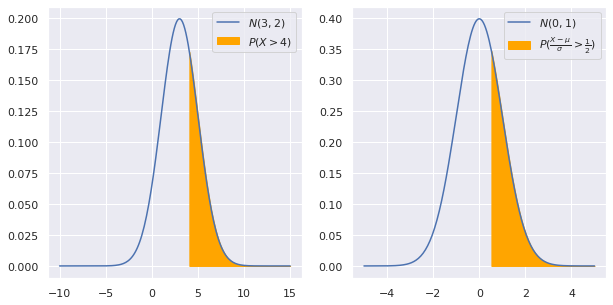

In [24]:
#hide_input
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

x = np.linspace(-10, 15, 200)
y = norm.pdf(x, loc = 3, scale = 2)

axes[0].plot(x, y, label = r"$N(3, 2)$")
axes[0].fill_between(x[x > 4], y[x > 4], color = 'orange', label = r"$P(X > 4)$")
axes[0].legend()
x = np.linspace(-5, 5, 200)
y = norm.pdf(x, loc = 0, scale = 1)

axes[1].plot(x, y, label = r"$N(0, 1)$")

mask = (x - 3) / 2 > 4
axes[1].fill_between(x[x > .5], y[x > .5], color = 'orange', label = r"$P(\frac{X - \mu}{\sigma} > \frac{1}{2})$")

axes[1].legend();

Of course, we can directly check if these two areas are equal

In [28]:
1 - norm.cdf(4, loc = 3, scale = 2) == 1 - norm.cdf(.5, loc = 0, scale = 1)

True

Now comes the interesting part lets take a closer look at $P(X > 4)$. Define a new random variable as $Y = 1(X > 4)$ where $1$ is the indicator function. So this just means it is $1$ if $X > 4$ and $0$ else. Whats is the expected value of this r.v ? Well it is a discrete r.v so we can just weight each outcome by it's propability. Hence 

$E(Y)=1 * P(X > 4) + 0 * (1 - P(X > 4))=P(X>4)$

So the expected value of $Y$ is the propability we are interested in! Next we can approimate this expected value with the sample mean of random draws of $Y$ and hence get an approximation for our propability. Since the sample mean will converge in propabilty to the true mean our estimate becomes better as $n -> \infty$. The question remains how to simulate draws from $Y$. Well it is simple since we can simulate draws from $X$ and then keep track of which are higher then $4$ and vice versa. This is very simple to code! This technique is also known as *monte carlo integration*.

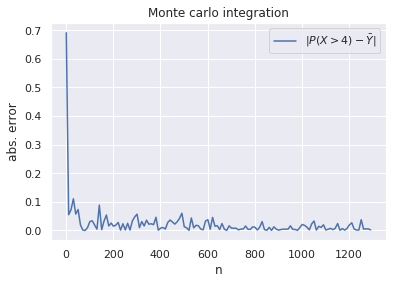

In [71]:
grid = range(1, 1300, 10)

truth = 1 - norm.cdf(.5, loc = 0, scale = 1) # the true probability of P(X > 4)

err = []
for n in grid:
    
    X = norm.rvs(size = n, loc = 3, scale = 2) # get draws from normal distribution
    Y = np.where(X > 4, 1, 0) # generate Y
    
    estimate = Y.mean()
    
    err.append(np.abs(estimate - truth))
    
    
fig, axes = plt.subplots(1,1)

axes.plot(grid, err, label = r"$|P(X > 4 ) - \bar{Y}|$")
axes.legend()
axes.set_xlabel("n")
axes.set_ylabel("abs. error")
axes.set_title("Monte carlo integration");
#fig.savefig("statistics_for_hackers.png")

    

We see our approximation quickly becomes reasonable and if we take $n = 1000000$ which is no problem for a computer we get a very accurate result.

In [70]:
X = norm.rvs(size = 1000000, loc = 3, scale = 2) # get draws from normal distribution
Y = np.where(X > 4, 1, 0) # generate Y
    
estimate = np.mean(Y)

print(f"estimate of the probability: {estimate}")
print(f"true probability is {truth}")

estimate of the probability: 0.308224
true probability is 0.3085375387259869


## TODO: Add simulation of transformed r.v.

as in {% cite murphy2012machine %}

## TODO: Add generalized monte carlo integration of objects of the form E(g(x))

## References

{% bibliography --cited %}